<a href="https://colab.research.google.com/github/paolochikalo/datascience_work/blob/master/TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Main goal of time series analysis is determining the stability of financial markets and efficiency of portfolios.
Notation:
	
> X --> Daily closing prices for Year;
	T --> Entire year; (Whole period)
	t --> single day; (single period )
	X(t) --> (ex of tee) Price for the single day, or other smallest time period; 
	X(t-1) --> previous period; 
	X(t+1) --> next period;

*Time series data doen not satisfy Gauss-Markov assumptions;*
(

 **https://www.statisticshowto.com/gauss-markov-theorem-assumptions/**

**https://www.statisticshowto.com/least-squares-regression-line/**
)

 ***White Noise*** --> special type of time series when data doesn’t have a pattern:

*   Constant mean;
*   Constant variance;
*   No autocorrelation --> No clear relationship between past and present values. *(p = corr( x(t),  x(t-1) )* --> How correlated is series with past versions of itself;  

For a white noise time series, all the autocorrelations are close to zero, so the past will not help you forecast the future.
If stock prices, follow a random walk then stock returns is a white noise. The best guess for tomorrow’s price is today’s price. 

How to test if a series (stock prices) is following a random walk or not:
Linear regression in time series values (prices):
First of all you need to regress current prices on lag prices (αslope):
Pt = β + αPt-1 + epsilon(t)[random noise] (it says that alpha is beta and beta is alpha???) 



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
top_indeces = pd.read_csv("./drive/My Drive/DATA/TimeSeries/TopIndexes.csv")
top_indeces.date = pd.to_datetime(top_indeces.date, dayfirst=True)
top_indeces.set_index('date', inplace=True)

In [ ]:
# spx --> S&P500
# dax --> DAX 30 German Stock Exchange
# ftse --> FTSE 100 London Stock Exchange
# nikkei --> NIKKEI 225 Japan stock exchange
print(top_indeces.describe())
top_indeces.head()

               spx           dax         ftse        nikkei
count  6269.000000   6269.000000  6269.000000   6269.000000
mean   1288.127542   6080.063363  5422.713545  14597.055700
std     487.586473   2754.361032  1145.572428   4043.122953
min     438.920000   1911.700000  2876.600000   7054.980000
25%     990.671905   4069.350000  4486.100000  10709.290000
50%    1233.420000   5773.340000  5662.430000  15028.170000
75%    1459.987747   7443.070000  6304.250000  17860.470000
max    2872.867839  13559.600000  7778.637689  24124.150000


,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


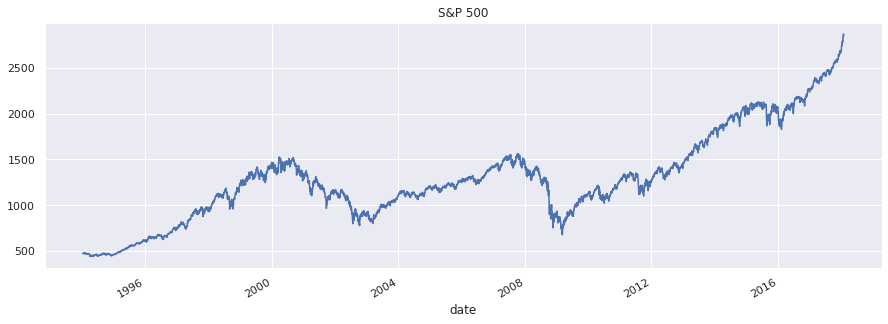

In [ ]:
top_indeces.spx.plot(figsize =(15,5), title="S&P 500")
plt.show()

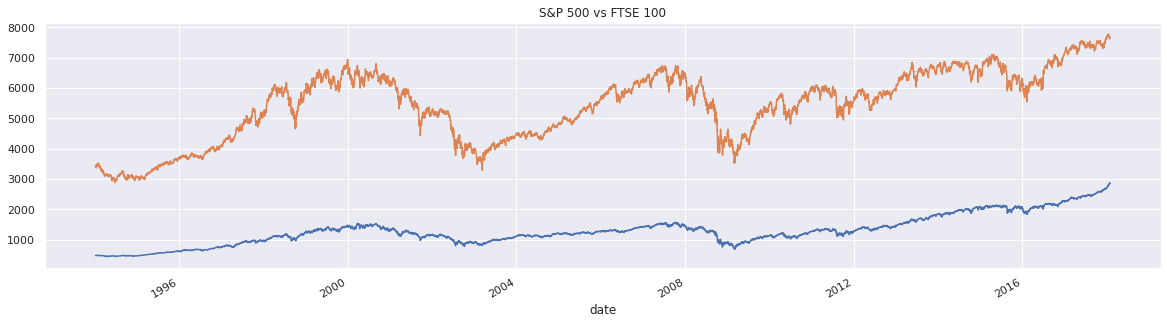

In [ ]:
top_indeces.spx.plot()
top_indeces.ftse.plot(figsize=(20,5), title = 'S&P 500 vs FTSE 100')
plt.show()

**QQ PLOT** -->
Quantile-Quantile plot, is the tool used to determine is the data distributed in the certain way.
Unless specified otherwise QQ Plot shows how the data fits normal distribution.
QQ Plot takes all values a variable can take and arranges them in order.

Y --> Shows prices, with the highest one at the top and the lowes one at the bottom

X --> Shows how many stdev's from the mean the values of the dataset are (Theoretical quantiles)

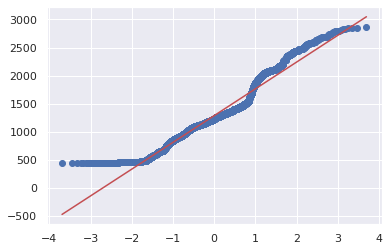

In [ ]:
import scipy.stats
import pylab
 
scipy.stats.probplot(top_indeces.spx, plot = pylab)
pylab.show()
# We can see that data are not normally distributed

In [ ]:
top_indeces.asfreq('b',method='ffill')
top_indeces.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [ ]:
del top_indeces['dax'] 
del top_indeces['ftse'] 
del top_indeces['nikkei'] 
top_indeces.head()

,spx
date,
1994-01-07,469.90
1994-01-10,475.27
1994-01-11,474.13
1994-01-12,474.17
1994-01-13,472.47


In [ ]:
# Splitting to train and test 
size = int(len(top_indeces)*0.8)
train_df = top_indeces.iloc[:size]
test_df = top_indeces.iloc[size:]

In [ ]:
top_indeces.spx.mean()

1288.1275420815098

***Building White Noise model***

In [ ]:
wn = np.random.normal(loc=train_df.spx.mean(), scale=train_df.spx.std(),size=len(train_df))
train_df['noise'] = wn

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
print(train_df.describe())
train_df.head()


               spx        Noise
count  5015.000000  5015.000000
mean   1091.357559  1093.745626
std     292.487977   295.757017
min     438.920000    65.255824
25%     914.608917   898.720947
50%    1144.581490  1098.876259
75%    1315.996495  1287.601361
max    1570.252238  2271.029234


,spx,Noise
date,,
1994-01-07,469.90,577.700338
1994-01-10,475.27,978.590670
1994-01-11,474.13,1157.918402
1994-01-12,474.17,1108.849340
1994-01-13,472.47,1507.837073


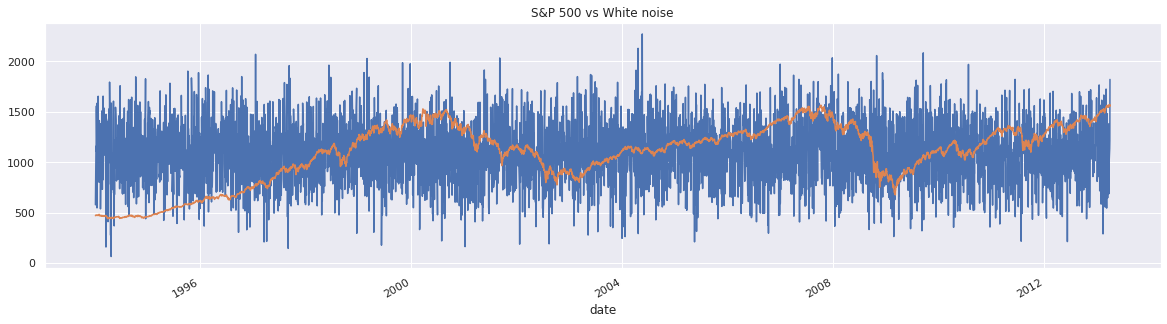

In [ ]:
train_df.noise.plot()
train_df.spx.plot(figsize=(20,5), title = 'S&P 500 vs White noise')
plt.show()

With financial time series when returns have negative autocorrelation we say it is **Mean Reversion** (Mean Reverting). Which has mountain peaky shape of ups and downs comparing to previous period.

When it has positive autocorrelation we say it is **Momentum** or Trend Following.

Many Hedge Funds strategies are only slightly more complicated versions of Mean Reversion and Momentum strategies.

Since stocks have historically negative autocorrelation on the weekly period (altering ups and downs). One of the popular strategies is to buy stocks that have dropped over the last week and sell stocks that have raised.

For other assets like commodities and currencies it has historically positive autocorrelation over the horizon of several months, so the typical strategy for hedge funds there is to buy commodities that have gone up in the last several month and sell those that have gone down. 

# A Popular Strategy Using Autocorrelation

One puzzling anomaly with stocks is that investors tend to overreact to news. Following large jumps, either up or down, stock prices tend to reverse. This is described as mean reversion in stock prices: prices tend to bounce back, or revert, towards previous levels after large moves, which are observed over time horizons of about a week. A more mathematical way to describe mean reversion is to say that stock returns are negatively autocorrelated.

This simple idea is actually the basis for a popular hedge fund strategy. If you're curious to learn more about this hedge fund strategy (although it's not necessary reading for anything else later in the course), see here.

# Are Interest Rates Autocorrelated?

When you look at daily changes in interest rates, the autocorrelation is close to zero. However, if you resample the data and look at annual changes, the autocorrelation is negative. This implies that while short term changes in interest rates may be uncorrelated, long term changes in interest rates are negatively auto correlated. A daily move up or down in interest rates is unlikely to tell you anything about interest rates tomorrow, but a move in interest rates over a year can tell you something about where interest rates are going over the next year. And this makes some economic sense: over long horizons, when interest rates go up, the economy tends to slow down, which consequently causes interest rates to fall, and vice versa.

Any significant non-zero autocorrelation implies that series can be forecasted from the past. 

Autocorrelation can be also useful for Model Selection since it may uncover the hidden structure of the data.

Alpha  Argument alpha sets the width of the confidence interval. Example (alpha = 0.05) gives 5% chance you can say that there is less than a 5% chance that we would observe such autocorrelation if the true autocorrelation were really zero (value of ACF is statistically significant). Confidence bands are wider if Alpha is lower or there are fewer observations.

# Confidence bands(interval) calculation: 

In the last chapter, you saw that the autocorrelation of MSFT's weekly stock returns was -0.16. That autocorrelation seems large, but is it statistically significant? In other words, can you say that there is less than a 5% chance that we would observe such a large negative autocorrelation if the true autocorrelation were really zero? And are there any autocorrelations at other lags that are significantly different from zero?
Even if the true autocorrelations were zero at all lags, in a finite sample of returns you won't see the estimate of the autocorrelations exactly zero. In fact, the standard deviation of the sample autocorrelation is 1/sqrt(N) where N is the number of observations, so if N=100, for example, the standard deviation of the ACF is 0.1, and since 95% of a normal curve is between +1.96 and -1.96 standard deviations from the mean, the 95% confidence interval is ±1.96/sqrt(N). This approximation only holds when the true autocorrelations are all zero.



If slope coefficient α is not significantly different (close) from 1 then we cannot reject the null hypothesis that the series is random walk (IT means series IS a random walk). We can reject null hypothesis (assume the series is not a random walk) in case slope coefficient is significantly less then 1.
Dickey-Fuller Test:

Regress difference in prices on a lag price

Pt - Pt-1(y-axis) = β + αPt-1 + epsilon(t)[random noise](x-axis)

Now we test whether slope coefficient α is zero. It should be significantly less than zero. But, the main statistics of course is a p-value, which should be less than 0.05. 

If you add more prices on the right-hand side (multiple linear regression) it is called Augmented Dickey-Fuller Test.

With the ADF test, the "null hypothesis" (the hypothesis that we either reject or fail to reject) is that the series follows a random walk. Therefore, a low p-value (say less than 5%) means we can reject the null hypothesis that the series is a random walk.

Stationarity:

Strong Stationarity: entire distribution of data is not depending on time (time-invariant)

Weak Stationarity: mean, variance and autocorrelation are time-invariant (i.e. for autocorrelation corr(Xt, Xt-lag) is only the function of lag )

Why do we care about Stationarity?  if parameters are different with time there are too many parameters to estimate.
Examples of non-stationary series:
	Random walk;
	Seasonality in series  np.diff(4) to get read of quarterly seasonality;
	White noise with change in mean and stdev over time  np.diff(1) converts to stationary white noise;
	Exponential series  np.log() to get read of exponentiallity;
White noise is stationary series;
Difference among white noise and random walk???  white noise has constant mean and stdev, random walk is not.

Trend: mean is raising (or falling) over time;

Variance: fluctuations of the time series are varying;

Skewness: Shift of the distribution. Negative Skew: The mass of the distribution is concentrated on the right. Positive Skew: the mass of the distribution is concentrated on the right. In finance you prefer positive skewness to be with a higher probability of significantly good returns on the right-hand side of the distribution and the compressed predicted left hand distribution of the negative returns. Skewness above 0 is suggesting non-normality, which you expect to get in the financial returns.

Kurtosis: Measure of the thickness of the tails of distribution. Which can be thought as a proxy for the probability of the outliers. Normal distribution is tending to have Kurtosis over 3. Most financial distributions are Leptokurtic: when a distribution has positive excess Kurtoisis (greater than 3)

Excess Kurtosis: since all Kurtosis are compared to normal one, most Python functions are returning Excess Kurtosis  sample Kurtosis minus 3. Which helps to demonstrate whether outliers are higher of lower than normal distribution. If Excess Kurtosis is higher than 0  Sample Kurtosis is higher than normal distribution. In finance High Excess Kurtosis is an indication of high risk  when large movements in returns happen often, this can be very bad thing for your portfolio if it moves in the wrong direction. High Kurtosis distributions tend to have thick tails means outliers with extreme negative or positive outcomes are more common.

Shapiro-Wilk: test for defining if the data are normally distributed:
from scipy.stats import shapiro
shapiro_results = shapiro(clean_returns)  returns tuple where second parameter is a p-value.


ARMA: For ARMA models summary const(coef) is a mean of model ar.L1.y is a phi parameter. 
Being able to forecast interest rates is of enormous importance, not only for bond investors but also for individuals like new homeowners who must decide between fixed and floating rate mortgages.

Cointegration: Even if two different time series (i.e. Pt and Qt) are random walks (thereby not forecastable). 
Linear combination of those models  Pt ~ Qt may  be NOT a random walk (thus forecastable), in such case those models are said to be cointegrated.





Analogy: Dog on a Leash
P​t ​​ = Owner
Q​t ​​= Dog
Both series separately look like a random walk, BuT:
Difference, or distance between them is mean reverting because of the leash  If dog falls too far behind, it gets pulled forward, If dog gets too far ahead, it gets pulled back.
Example: (Substitutes) Heating Oil and Natural Gas prices, Platinum and Palladium, Corn and Wheat, Corn and Sugar. But this may not work for competitors (Coke and Pepsi, Apple and Blackberry). For finding the cointegration we need to check the SPREAD (or difference) among two series.
For commodities there are economic forces that cointegrating two series of prices together.
Steps to Test for Cointegration: 
	Regress Pt on Qt and get the slope c to get the cointegration vector; 
	Run Augmented Dickey-Fuller test on Residuals of Regression Pt ~ cQt to test for a random walk;
	Or Use coint(P,Q) function from statsmodels.tsa.stattools;

Analyzing Temperature Data:

	Test for Random Walk
	Take first differences
	Compute ACF and PACF
	Fit a few AR, MA, and ARMA models
	Use Information Criterion to choose best model
	Forecast temperature over next 30 years

What is Random Walk (with Drift)???  trend

Keep in mind that the estimate of the drift will have a much bigger impact on long range forecasts than the ARMA parameters.

Advanced Topics

	GARCH Models
	Nonlinear Models
	Multivariate Time Series Models
	Regime Switching Models
	State Space Models and Kalman Filtering
Investment Risk
	Risk in financial markets is a measure of uncertainty
	Dispersion or variance of financial returns
How do you typically measure risk?
	Standard deviation or variance of daily returns
	Kurtosis of the daily returns distribution
	Skewness of the daily returns distribution
	Historical drawdown
Risk is hinged around two fundamental concepts: Returns and Probability 

Returns are derived from the stock prices and expressed as percentages in a decimal form. Two types of returns:

Discrete returns (simple returns) are the most commonly used, and represent periodic (e.g. daily, weekly, monthly, etc.) price movements: Rt = (Pt2(today’s price) – Pt1(yesterday’s price)) / Pt1(yesterday’s price)  this gives you percentage gain or loss for the period: df.pct_change()
Log returns (continuous returns) are mostly used in academic research and math, financial modeling. They assume continuous compounding: Rl = ln(Pt2/Pt1) = ln(Pt2) – ln(Pt1)   Log returns aggregated across time, while discrete returns aggregated across assets.
For building portfolios with multiple assets discrete returns are more appropriate. 

(Statistical) Moments of Distributions analyzed and compared to other distributions: 

	first moment  mean (mu) – essentially an average outcome of a random sample of the distribution;
	second moment  variance (stdev or sigma^2) – measure of the Volatility in outcomes; Investment with higher stdev, sigma, volatility is viewed as higher risk investment. Volatility scales with the square root of time;
	third moment  skewness measure of the tilt (наклон) of the distribution;
	forth moment  kurtosis measure of the sickness of the tails of distribution;
Financial returns tend not to be normally distributed with positive skewness and kurtosis higher than 3. That means that financial returns have a higher probability of both outliers and positive returns over negative comparing to normal distribution.

High kurtosis and large skewness are simple indicators of non-normal returns. 